In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\olibh\OneDrive\Desktop\Healthcare.csv")


In [3]:
df.head(3)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2/2/2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,10/7/2022,Aspirin,Normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224655,202.000000
50%,52.000000,25538.069380,302.000000
75%,68.000000,37820.508432,401.000000
max,89.000000,52764.276740,500.000000


In [6]:
df['age_group'] = pd.cut(df['Age'],
                         bins=[0, 25, 40, 60, 100],
                         labels=['18-25', '26-40', '41-60', '60+'])


In [7]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [8]:
df.shape

(55500, 16)

In [9]:
df.duplicated().sum()

np.int64(534)

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(54966, 16)

In [12]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns


Index(['name', 'age', 'gender', 'blood_type', 'medical_condition',
       'date_of_admission', 'doctor', 'hospital', 'insurance_provider',
       'billing_amount', 'room_number', 'admission_type', 'discharge_date',
       'medication', 'test_results', 'age_group'],
      dtype='object')

In [13]:
df["date_of_admission"] = pd.to_datetime(df["date_of_admission"])
df["discharge_date"] = pd.to_datetime(df["discharge_date"])


In [14]:
df.head(3)

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,age_group
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2024-02-02,Paracetamol,Normal,26-40
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,60+
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,2022-10-07,Aspirin,Normal,60+


In [15]:
df.isnull().sum()

name                  0
age                   0
gender                0
blood_type            0
medical_condition     0
date_of_admission     0
doctor                0
hospital              0
insurance_provider    0
billing_amount        0
room_number           0
admission_type        0
discharge_date        0
medication            0
test_results          0
age_group             0
dtype: int64

In [16]:
df["gender"] = df["gender"].str.strip().str.title()
df["medical_condition"] = df["medical_condition"].str.strip().str.title()
df["admission_type"] = df["admission_type"].str.strip().str.title()


In [17]:
df["length_of_stay"] = (df["discharge_date"] - df["date_of_admission"]).dt.days


In [18]:
df.head(2)

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,age_group,length_of_stay
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2024-02-02,Paracetamol,Normal,26-40,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,60+,6


In [19]:
df = df[df["length_of_stay"] >= 0]


In [20]:
df["billing_category"] = pd.qcut(df["billing_amount"],
                                 q=4,
                                 labels=["Low","Medium","High","Very High"])


In [24]:
df.head(3)

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,age_group,length_of_stay,billing_category
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2024-02-02,Paracetamol,Normal,26-40,2,Medium
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,60+,6,High
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,2022-10-07,Aspirin,Normal,60+,15,High


In [ ]:
##What Are the Primary Drivers of Hospital Revenue?

In [ ]:
##(1) Revenue by Medical Condition

In [25]:
condition_revenue = df.groupby("medical_condition")["billing_amount"].sum().sort_values(ascending=False)

condition_revenue.head(10)


medical_condition
Diabetes        2.364870e+08
Obesity         2.360067e+08
Arthritis       2.351676e+08
Hypertension    2.333785e+08
Asthma          2.331363e+08
Cancer          2.298922e+08
Name: billing_amount, dtype: float64

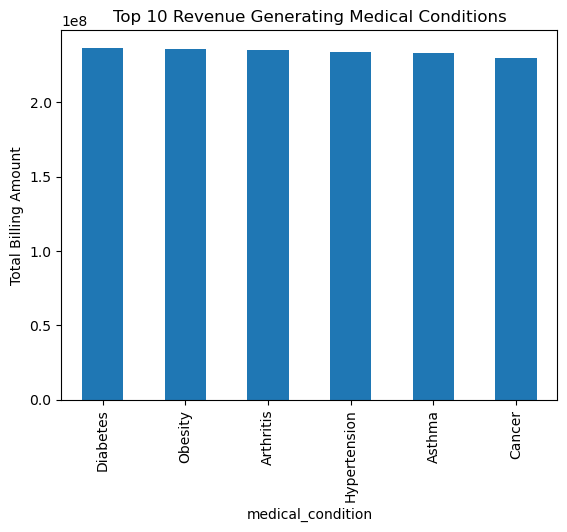

In [34]:
plt.figure()
condition_revenue.head(54966).plot(kind="bar")
plt.title("Top 10 Revenue Generating Medical Conditions")
plt.ylabel("Total Billing Amount")
plt.xticks(rotation= 'vertical')
plt.show()


In [ ]:
@##(2)Revenue by Admission Type

In [37]:
admission_type = df.groupby("admission_type")["billing_amount"].sum().sort_values(ascending=False)


<Axes: ylabel='billing_amount'>

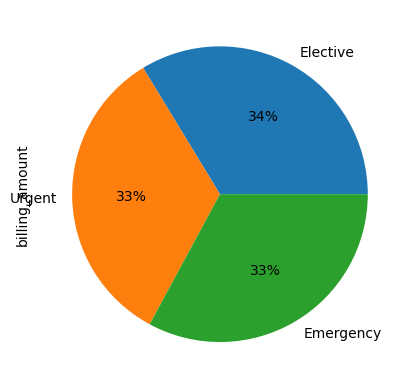

In [40]:
admission_type.head(54966).plot(kind='pie',autopct = '%1.0f%%')

In [ ]:
##Does Length of Stay Significantly Impact Billing Amount?

In [41]:
df[["length_of_stay", "billing_amount"]].corr()


,length_of_stay,billing_amount
length_of_stay,1.000000,-0.004891
billing_amount,-0.004891,1.000000


In [44]:
df["stay_group"] = pd.cut(
    df["length_of_stay"],
    bins=[0,3,7,14,30],
    labels=["0-3 Days","4-7 Days","8-14 Days","15+ Days"]
)


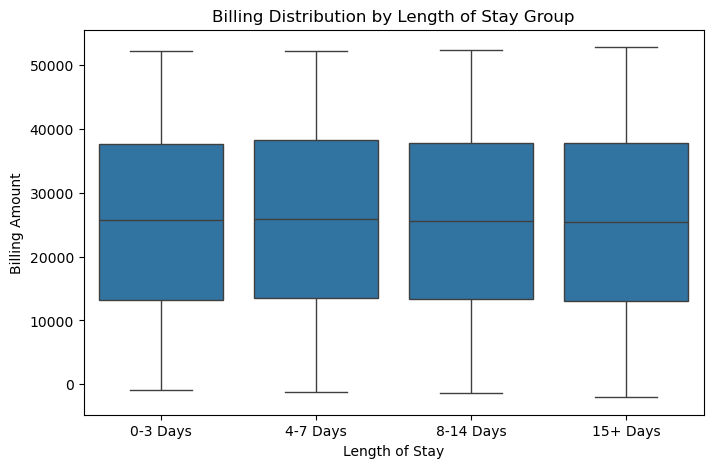

In [46]:
plt.figure(figsize=(8,5))
sns.boxplot(x="stay_group", y="billing_amount", data=df)

plt.title("Billing Distribution by Length of Stay Group")
plt.xlabel("Length of Stay")
plt.ylabel("Billing Amount")
plt.show()


In [ ]:
##Is Revenue Concentrated Among Few Segments?

In [47]:
pareto = df.groupby("medical_condition")["billing_amount"].sum().sort_values(ascending=False)

pareto_df = pareto.reset_index()
pareto_df["cumulative_%"] = pareto_df["billing_amount"].cumsum() / pareto_df["billing_amount"].sum() * 100

pareto_df.head(10)


,medical_condition,billing_amount,cumulative_%
0,Diabetes,2.364870e+08,16.842982
1,Obesity,2.360067e+08,33.651757
2,Arthritis,2.351676e+08,50.400772
3,Hypertension,2.333785e+08,67.022363
4,Asthma,2.331363e+08,83.626706
5,Cancer,2.298922e+08,100.000000


In [49]:
df.shape

(54966, 19)

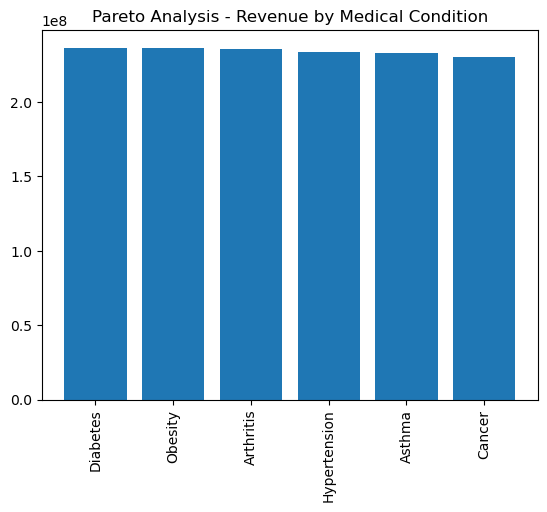

In [48]:
plt.figure()
plt.bar(pareto_df["medical_condition"], pareto_df["billing_amount"])
plt.xticks(rotation=90)
plt.title("Pareto Analysis - Revenue by Medical Condition")
plt.show()


In [ ]:
## (1) If strong positive relationship → operational inefficiency increases cost

(2) Opportunity to reduce unnecessary extended stays

(3) Improve discharge planning